C:\Users\ruifang\anaconda3\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\Users\ruifang\anaconda3\lib\site-packages\torch\nn\functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 2.433267593383789
1 2.3993422985076904
2 2.367342710494995
3 2.33719539642334
4 2.308823347091675
5 2.2821483612060547
6 2.257091999053955
7 2.2335755825042725
8 2.211520195007324
9 2.1908483505249023
10 2.171483278274536
11 2.1533515453338623
12 2.1363794803619385
13 2.120497465133667
14 2.105637788772583
15 2.0917351245880127
16 2.0787274837493896
17 2.0665557384490967
18 2.0551631450653076
19 2.0444962978363037
20 2.0345051288604736
21 2.025141716003418
22 2.0163609981536865
23 2.0081210136413574
24 2.000382423400879
25 1.9931086301803589
26 1.9862642288208008
27 1.9798182249069214
28 1.9737398624420166
29 1.9680017232894897
30 1.9625775814056396
31 1.9574437141418457
32 1.9525775909423828
33 1.9479584693908691
34 1.9435677528381348
35 1.9393870830535889
36 1.9354007244110107
37 1.9315930604934692
38 1.927950382232666
39 1.9244599342346191
40 1.921109676361084
41 1.9178885221481323
42 1.9147865772247314
43 1.9117944240570068
44 1.9089038372039795
45 1.9061062335968018
46 1.9033946

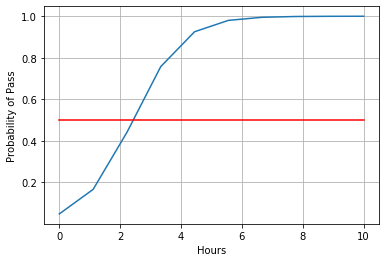

In [12]:
 # Logistic Regression

import torch
import torch.nn as nn
import torch.nn.functional as F
    
# 准备数据， 二维的tensor
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1) # 权重，偏置
    
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred
    
model = LogisticRegressionModel()

# 交叉熵损失函数， size_average=False返回loss的sum
criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
import numpy as np
import matplotlib.pyplot as plt
 
x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view(200, 1)
y_t = model(x_t)
y = y_t.data.numpy()

plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()
    


